In [1]:
import numpy as np
import pandas as pd

构建数据集

In [2]:
rowdata = {'颜色深度':[14.23,13.2,13.16,14.37,13.24,12.07,12.43,11.79,12.37,12.04],
          '酒精浓度':[5.64,4.38,5.68,4.80,4.32,2.76,3.94,3.  ,2.12,2.6 ],
          '品种':[0,0,0,0,0,1,1,1,1,1]} 
wine_data = pd.DataFrame(rowdata) 
wine_data       # 0 代表 “黑皮诺”，1 代表 “赤霞珠”

,颜色深度,酒精浓度,品种
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,4.80,0
4,13.24,4.32,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.00,1
8,12.37,2.12,1
9,12.04,2.60,1


In [3]:
X = np.array(wine_data.iloc[:,0:2])
Y = np.array(wine_data.iloc[:,-1])

In [4]:
new_data = np.array([12.8,4.1])

In [5]:
import matplotlib.pyplot as plt

In [6]:
X[Y==1,0]

array([12.07, 12.43, 11.79, 12.37, 12.04])

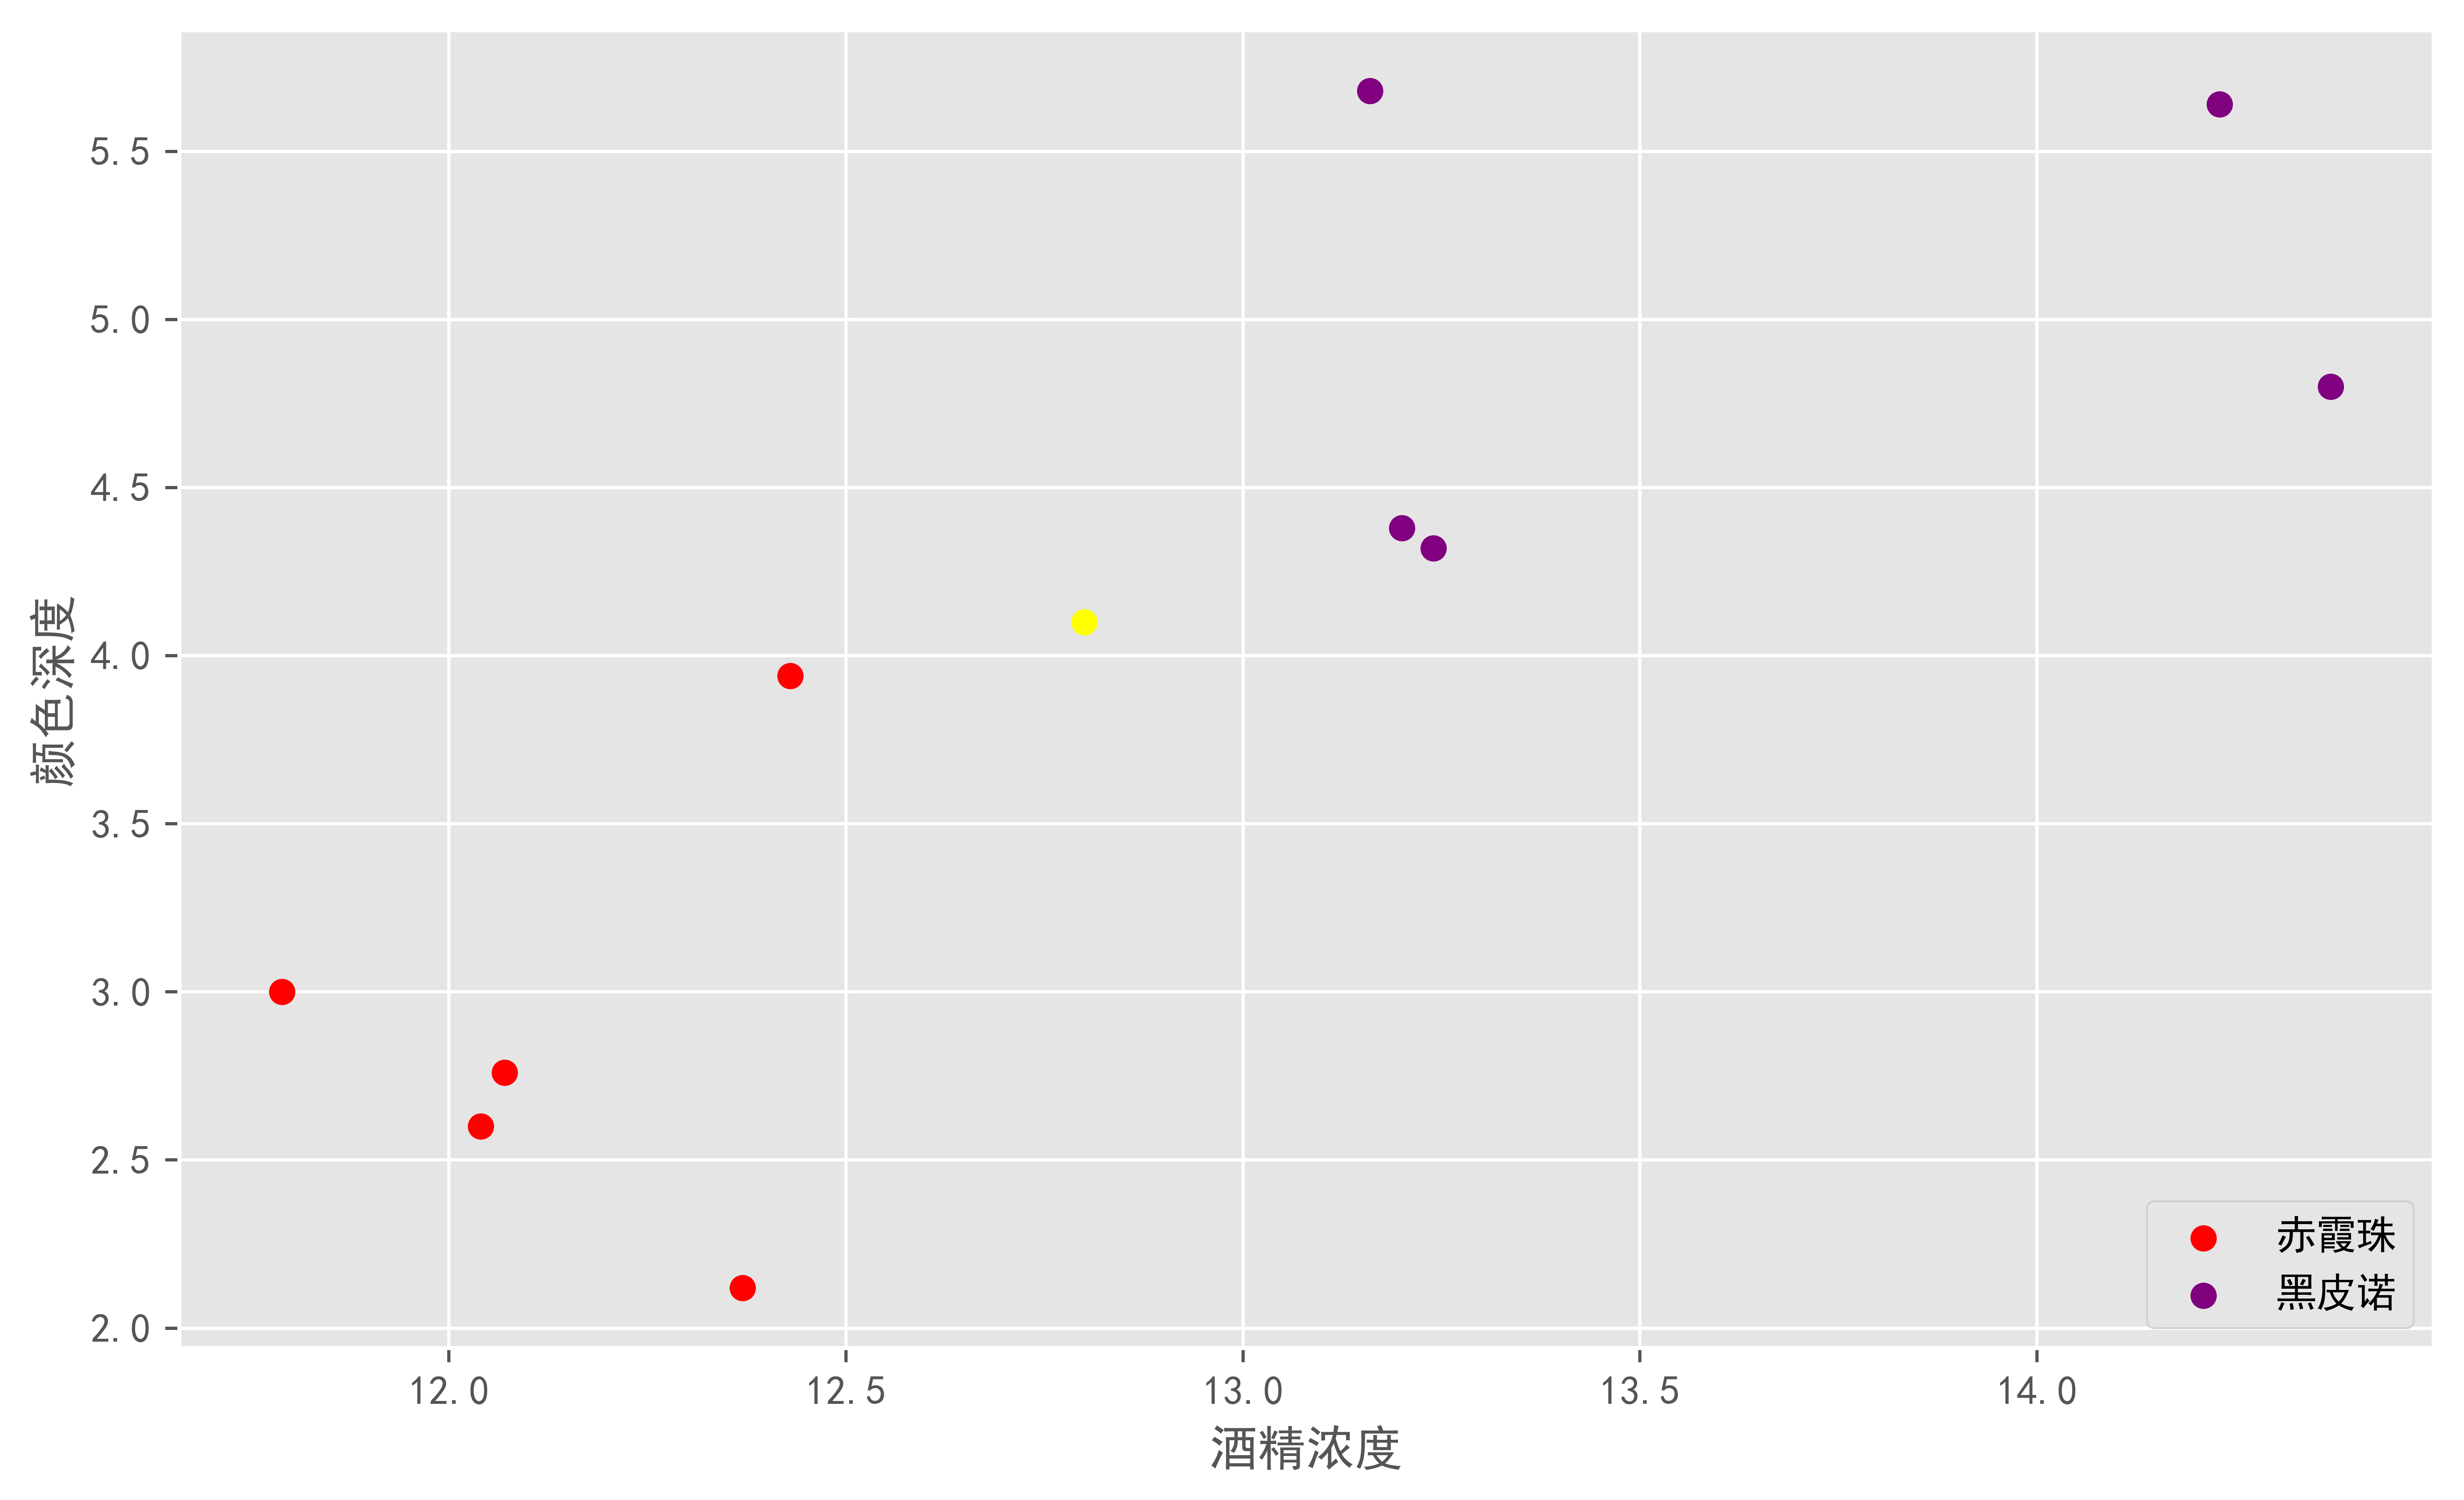

In [7]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
plt.figure(figsize=(10,6),dpi=720)

plt.scatter(X[Y==1,0], X[Y==1,1], color='red', label='赤霞珠')
plt.scatter(X[Y==0,0], X[Y==0,1], color='purple', label='黑皮诺')
plt.scatter(new_data[0],new_data[1], color='yellow')

plt.xlabel('酒精浓度')
plt.ylabel('颜色深度')
plt.legend(loc='lower right')
plt.savefig('葡萄酒样本.png')

第一步：算距离

In [8]:
from math import sqrt

In [9]:
distance = [sqrt(np.sum((x-new_data)**2)) for x in X ]

第二步：找邻居

In [10]:
sort_dist = np.argsort(distance)

In [11]:
k = 3         #手动设置K值
topK = [Y[i] for i in sort_dist[:k]]
topK

[1, 0, 0]

第三步：做分类

In [12]:
from collections import Counter

In [13]:
votes = Counter(topK)

In [14]:
predict = votes.most_common(1)[0][0]

In [15]:
predict     

0

最终分类结果为0类，代表新的酒为"黑皮诺"

以下是将上述过程封装为一个函数，并测试函数运行结果

In [16]:
def KNN(inx,dataset,k):
    import numpy as np
    import pandas as pd
    from math import sqrt
    from collections import Counter
    
    result = []
    distance = [sqrt(np.sum((x-new_data)**2)) for x in np.array(dataset.iloc[:,0:2])]
    sort_dist = np.argsort(distance)
    topK = [dataset.iloc[:,-1][i] for i in sort_dist[:k]]
    result.append(Counter(topK).most_common(1)[0][0])
    return result

In [17]:
KNN(new_data,wine_data,3)

[0]